### **OBJECTIVE : In this notebook,we'll first process the data from previous notebook to get it into suitable format for training and then we'll train Convolutional-Neural-Networks to predict age and gender given an face image.**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setting random seed
np.random.seed(42)

In [3]:
# dataset path in drive
x = np.load(r"/content/drive/MyDrive/x.npy")
y_ = np.load(r"/content/drive/MyDrive/y.npy")

print(x.shape)
print(y_.shape)

(21310, 48, 48, 1)
(21310, 2)


In [4]:
# Y --> [Age,Gender(0,1)]  where 0 is male / 1 is female
y_[:10]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

### **Converting numpy array to dataframe**

We'll convert the ground-truth (y) numpy array to dataframe so that it becomes easy to fetch different features.

In [5]:
# creating a list of column names
column_values = ["age","gender"]
  
# creating the dataframe
y_ = pd.DataFrame(data = y_, 
                  columns = column_values)

# printing first few rows
y_.head(10)

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


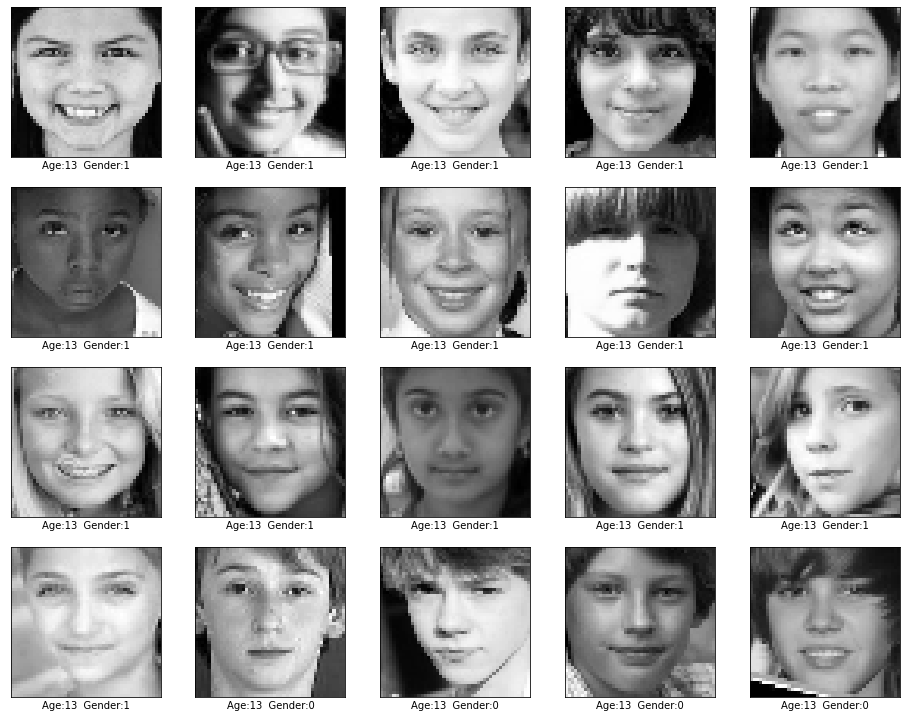

In [6]:
# Displaying some images

plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i].reshape(48,48),cmap="gray")
    plt.xlabel(
        "Age:"+str(y_['age'].iloc[i])+
        "  Gender:"+ str(y_['gender'].iloc[i])
    )
plt.show()

# **1.0] Model Training**
In this part we'll train our models to predict age and gender.So what we'll do here is,we'll train 2 different models.The first model will predict the age given a face image and other model will predict the gender.Data splitting will happen differently for each model.

## **1.1] Model for Gender Prediction**
This model will basically predict the gender of the person given face image.It comes under binary classification and hence we'll try to create a classifier which will output a probability value (0-1) and then use a threshold value to make the decision.

In [7]:
# X remains the same for both models,lets define the Y
# Y is 0 for male / 1 for female

y = y_['gender']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: gender, dtype: int64

In [8]:
# Data splitting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("No. of Train samples : ",len(x_train))
print("No. of Test samples : ",len(x_test))

No. of Train samples :  14917
No. of Test samples :  6393


In [9]:
# Importing required functions
from tensorflow import keras
from tensorflow.keras import layers as L

# Buidling the model
model = keras.Sequential()
model.add(L.InputLayer(input_shape=(48,48,1)))
model.add(L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(L.BatchNormalization())
model.add(L.MaxPooling2D((2, 2)))
model.add(L.Conv2D(64, (3, 3), activation='relu'))
model.add(L.MaxPooling2D((2, 2)))
model.add(L.Flatten())
model.add(L.Dense(64, activation='relu'))
model.add(L.Dropout(rate=0.5))
model.add(L.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

In [10]:
# Compiling the model
model.compile(optimizer='sgd',
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [11]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.2700
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2700):
            print("\nReached 0.2700 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [12]:
# start training the model 
history = model.fit(x_train, y_train, epochs=20,batch_size=64, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/20
234/234 [==============================] - 5s 15ms/step - loss: 0.5192 - accuracy: 0.7410 - val_loss: 0.6114 - val_accuracy: 0.8118
Epoch 2/20
234/234 [==============================] - 3s 14ms/step - loss: 0.3868 - accuracy: 0.8269 - val_loss: 0.4654 - val_accuracy: 0.7987
Epoch 3/20
234/234 [==============================] - 3s 14ms/step - loss: 0.3421 - accuracy: 0.8506 - val_loss: 0.3482 - val_accuracy: 0.8422
Epoch 4/20
234/234 [==============================] - 3s 14ms/step - loss: 0.3158 - accuracy: 0.8630 - val_loss: 0.3181 - val_accuracy: 0.8569
Epoch 5/20
234/234 [==============================] - 3s 14ms/step - loss: 0.3022 - accuracy: 0.8693 - val_loss: 0.3695 - val_accuracy: 0.8226
Epoch 6/20
234/234 [==============================] - 3s 14ms/step - loss: 0.2880 - accuracy: 0.8766 - val_loss: 0.3403 - val_accuracy: 0.8414
Epoch 7/20
234/234 [==============================] - 3s 14ms/step - loss: 0.2754 - accuracy: 0.8811 - val_loss: 0.2949 - val_accuracy: 0.8695

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


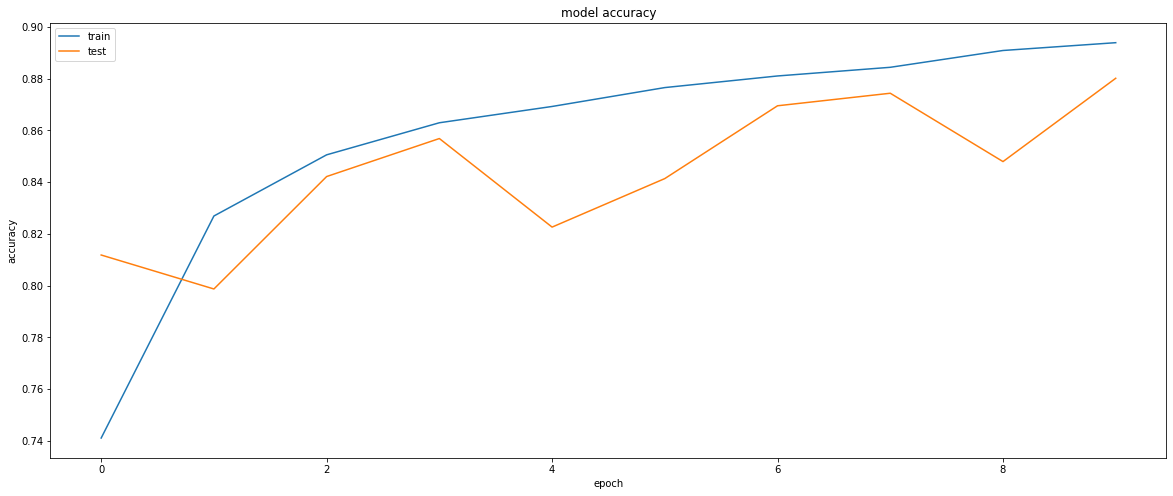

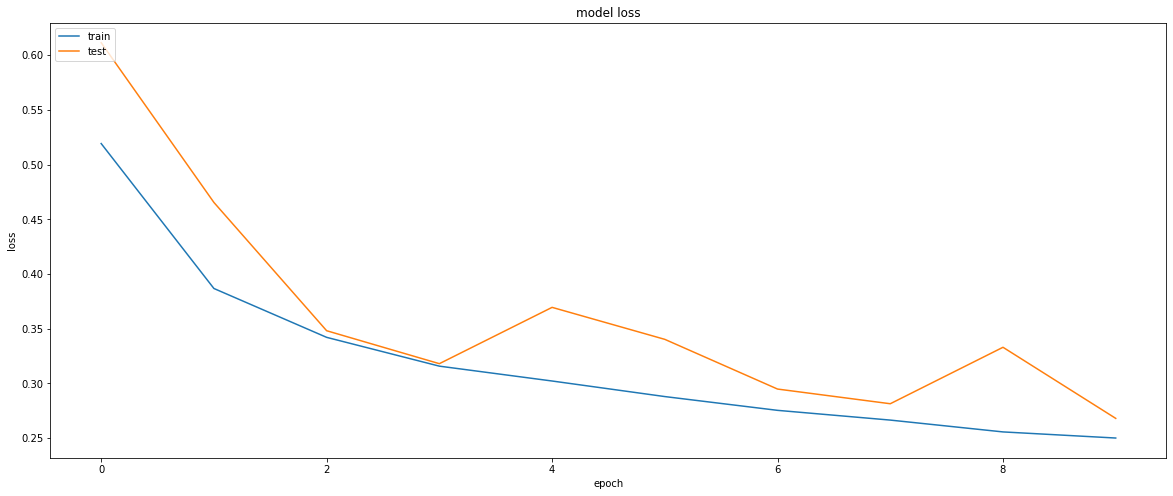

In [13]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

200/200 [==============================] - 1s 5ms/step - loss: 0.2681 - accuracy: 0.8802
Test loss: 0.2680761516094208
Test Accuracy: 0.8801814317703247


Actual Value (Gender) :  1  (0 is male / 1 is female)
Predicted Value (probability) :  0.8419911  (if value < 0.5 then Male else Female)


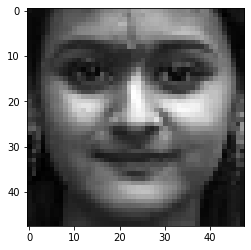

In [15]:
# Lets run some Inferences
print("Actual Value (Gender) : ", y[2000] , " (0 is male / 1 is female)")

predicted = model.predict(x[2000].reshape(1,48,48,1))
print("Predicted Value (probability) : " ,predicted[0][0], " (if value < 0.5 then Male else Female)") 

plt.imshow(x[2000].reshape(48,48),cmap="gray")
plt.show()

### **Saving the Gender-prediction model**

In [16]:
# Save Model Weights and Architecture Together
model.save("Gender_Prediction_model.h5")

## **1.1] Model for Age Prediction**
This model will basically predict the age of the person given face image. We'll use Relu activation here instead of Sigmoid,so this could come under regression problem.

In [17]:
# X remains the same for both models,lets define the Y
# Y is an Integer representing age.

y = y_['age']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: age, dtype: int64

In [18]:
# Data splitting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("No. of Train samples : ",len(x_train))
print("No. of Test samples : ",len(x_test))

No. of Train samples :  14917
No. of Test samples :  6393


In [19]:
# Importing required functions
from tensorflow import keras
from tensorflow.keras import layers as L

# Buidling the model
model = keras.Sequential()
model.add(L.InputLayer(input_shape=(48,48,1)))
model.add(L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(L.BatchNormalization())
model.add(L.MaxPooling2D((2, 2)))
model.add(L.Conv2D(64, (3, 3), activation='relu'))
model.add(L.MaxPooling2D((2, 2)))
model.add(L.Flatten())
model.add(L.Dense(64, activation='relu'))
model.add(L.Dropout(rate=0.5))
model.add(L.Dense(1, activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

In [20]:
# Compiling the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [21]:
# custom callback to stop the training when certain metric value is reached

# Stop training when validation loss reach 90
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<90):
            print("\nReached 90 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [22]:
# start training the model 
history = model.fit(x_train, y_train, epochs=20,batch_size=64, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/20
234/234 [==============================] - 4s 15ms/step - loss: 191.8210 - mae: 10.7898 - val_loss: 780.3472 - val_mae: 24.2444
Epoch 2/20
234/234 [==============================] - 3s 14ms/step - loss: 132.3809 - mae: 8.9006 - val_loss: 404.2574 - val_mae: 16.8165
Epoch 3/20
234/234 [==============================] - 3s 14ms/step - loss: 118.9272 - mae: 8.3131 - val_loss: 187.0616 - val_mae: 10.7653
Epoch 4/20
234/234 [==============================] - 3s 14ms/step - loss: 112.3873 - mae: 8.0539 - val_loss: 126.0376 - val_mae: 8.4690
Epoch 5/20
233/234 [============================>.] - ETA: 0s - loss: 109.5734 - mae: 7.9343
Reached 90 val_loss so cancelling training!
234/234 [==============================] - 3s 15ms/step - loss: 109.5508 - mae: 7.9335 - val_loss: 70.6557 - val_mae: 6.5876


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


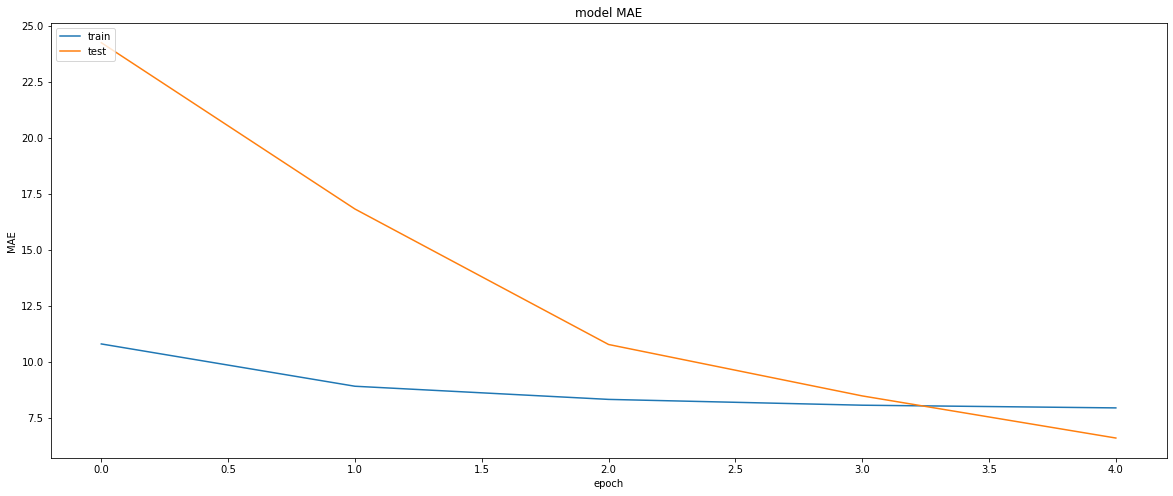

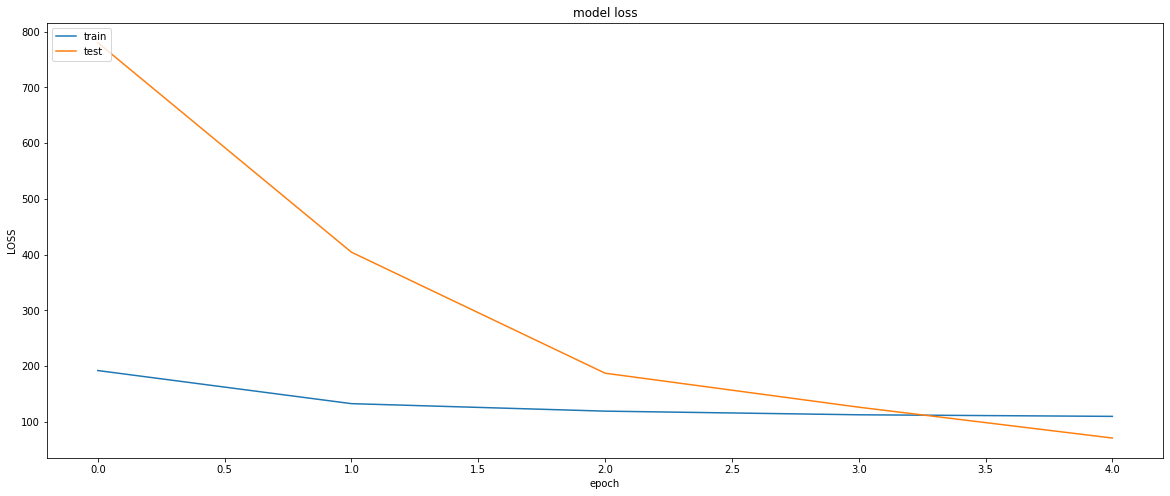

In [25]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test MAE: {}'.format(acc))

200/200 [==============================] - 1s 5ms/step - loss: 70.6557 - mae: 6.5876
Test loss: 70.6557388305664
Test MAE: 6.587621688842773


Actual Value (Age) :  26  years
Predicted Value :  35.66  years


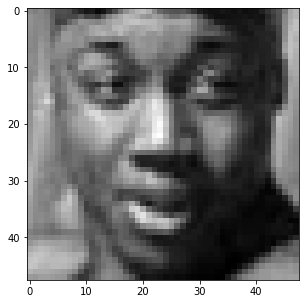

In [35]:
# Lets run some Inferences
print("Actual Value (Age) : ", y[6500]," years")

predicted = model.predict(x[6500].reshape(1,48,48,1))
print("Predicted Value : " ,round(predicted[0][0],2) , " years") 

plt.figure(figsize=(5,5))
plt.imshow(x[6500].reshape(48,48),cmap="gray")
plt.show()

In [36]:
# Save Model Weights and Architecture Together
model.save("Age_Prediction_model.h5")

### **CONCLUSION : The objective of this notebook have been achieved. We trained and saved our models which we can now use in production environment.**